# Run the whole deltas algorithm

In [56]:
%load_ext autoreload
%autoreload 2

import numpy as np
import deltas.pipeline.run as run
import deltas.model_deltas as model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [57]:
N1 = 10000
N2 = 10
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


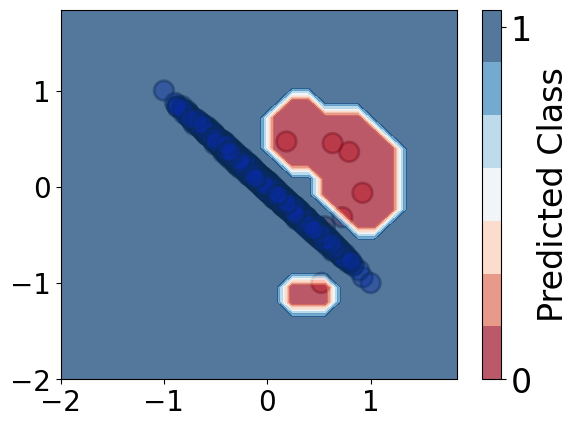

SMOTE


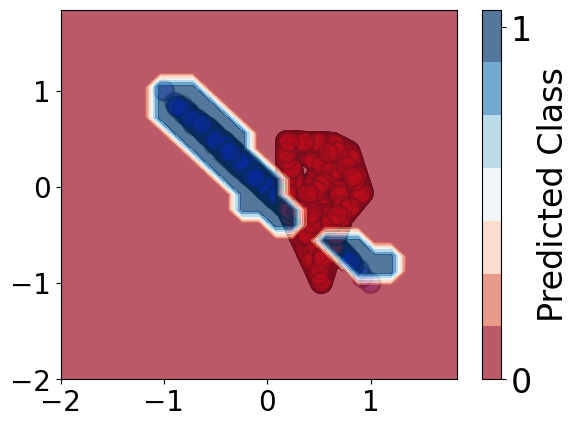

In [58]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


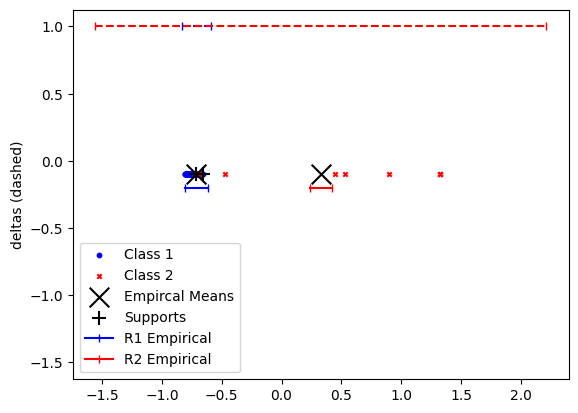

Best Random Downsampled dataset solution found with budget: 100 and 2 found viable downsampled solutions
Found downsampled solution by removing 5592 number of points


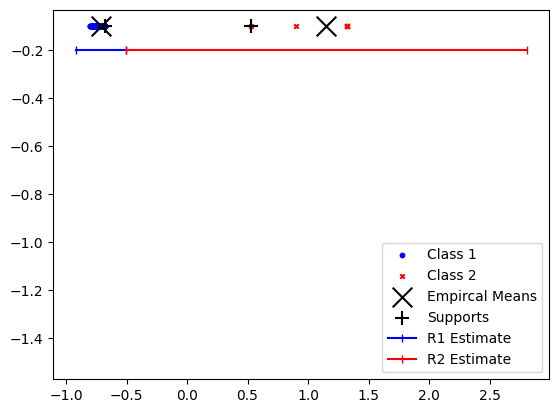

In [63]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = model_deltas.downsample_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, max_trials=100)

## Show parameters

In [ ]:
deltas_model.print_params()

Parameters
                R:  1.3233843306167798
                N1: 9811
                N2: 8
                R1: 0.09515204205530792
                R2: 0.6644107400678886
                M:  1.1198121849265612
                D:  1.821747903831442
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.74265
SMOTE accuracy: 0.90805
deltas accuracy: 0.92715

original F1: 0.6534706793240422
SMOTE F1: 0.9045518243629003
deltas F1: 0.9214258749932589

original precision0: 0.6601967386281111
SMOTE precision0: 0.8801826143669058
deltas precision0: 0.8728288382648163

original precision1: 1.0
SMOTE precision1: 0.9403258875580015
deltas precision1: 1.0



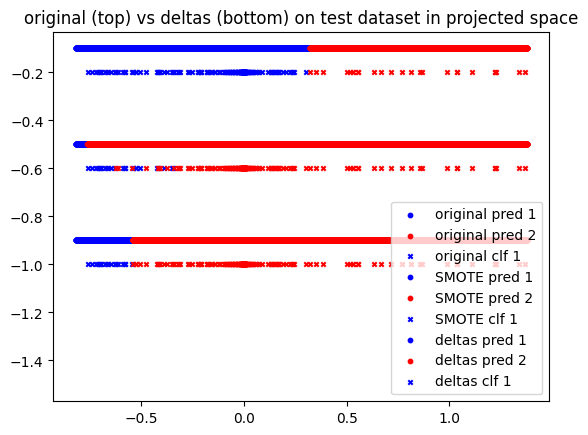

original


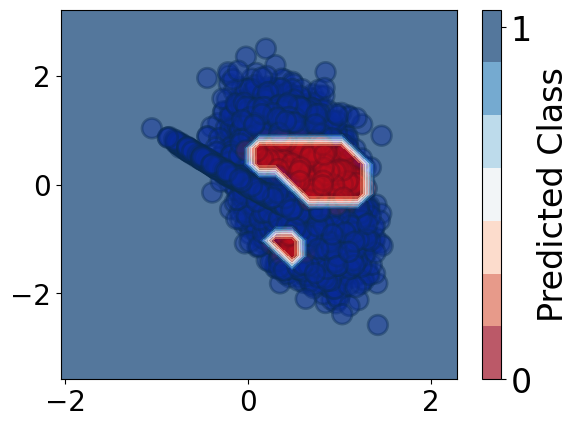

SMOTE


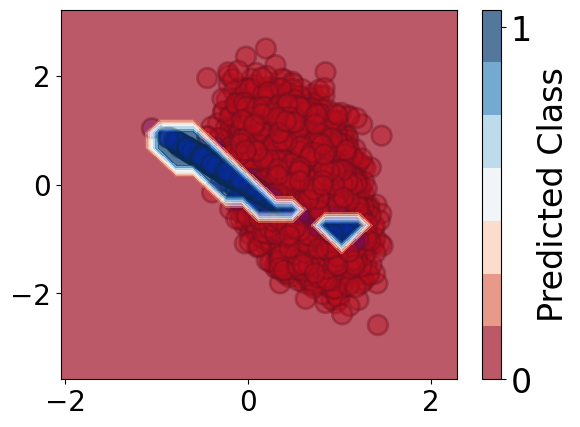

deltas


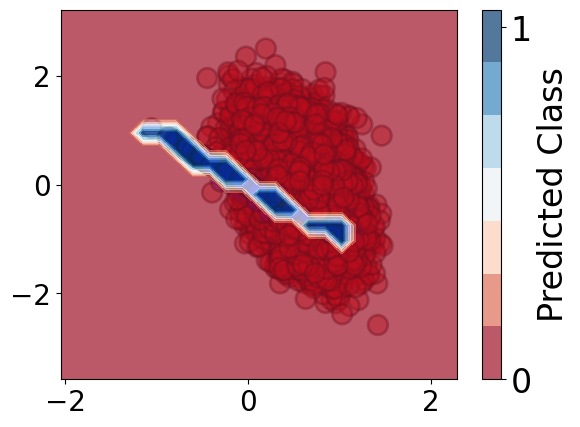

In [ ]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)